In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
import statistics as stat

# C5_S6_Challange

# Task 1: T_test for single sample and two tailed

In [4]:
sample=[12,34,56,78,23,45]
mean=np.mean(sample)
std=stat.stdev(sample)
popmean=40
n=len(sample)
dof=n-1
alpha=.1


In [107]:
sam=[15,16,16,0,7,20,6,8,17,25,8,21,29,11,9,21,3,12]
sam_mean=np.mean(sam)
sam_std=stat.stdev(sam)
pop_mean=40
n=len(sam)
DOF=n-1
alpha=0.1

In [109]:
print('Sample mean: ',sam_mean)
print('Sample std:',sam_std)
print('Population mean:',pop_mean)
print('Sample lenght:',n)

Sample mean:  13.555555555555555
Sample std: 7.8006200524454705
Population mean: 40
Sample lenght: 18


# Hypothesis

# Task 1a: Statistics

# Task 1b: T_Critical

In [8]:
pos_Tc=st.t.ppf(1-alpha,DOF)
pos_Tc

1.3333793897216268

In [10]:
neg_Tc=st.t.ppf(alpha,DOF)
neg_Tc

-1.3333793897216264

# Task 1c: Sample mean and Std deviation

In [12]:
sam_mean=np.mean(sam)
sam_mean

13.555555555555555

In [14]:
sam_std=stat.stdev(sam)
sam_std

7.8006200524454705

# T-Statistics and P_Value

In [16]:
T_Statistics=(sam_mean-pop_mean)/(sam_std/np.sqrt(n))
T_Statistics

-14.3827381918304

In [18]:
P_Value=st.t.sf(abs(T_Statistics),DOF)
P_Value

3.009920956967664e-11

# Task 1d: population mean using the confidence interval

In [63]:
a=(sam_mean-T_Statistics)
b=(sam_std/stat.sqrt(n))
Lower=a*b
Lower

51.36801122438379

In [64]:
a=(sam_mean+T_Statistics)
b=(sam_std/stat.sqrt(n))
Upper=a*b
Upper

-1.5208776645050937

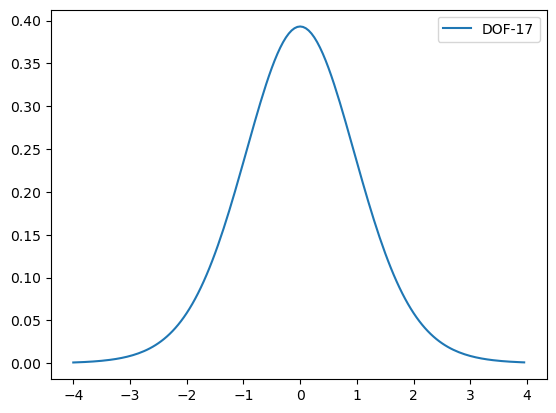

In [108]:
x=np.arange(-4,4,0.05)
y=st.t.pdf(x,DOF)
plt.plot(x,y,label='DOF-'+str(DOF))
plt.legend()

# Task 1e: Conclusion

In [35]:
if neg_Tc < T_Statistics < pos_Tc and P_Value > alpha:
    print('Accept the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


# Task 2: T_test for two sample and two tailed

In [90]:
sam1=[4.05,4.01,4.04,4.02]
sam2=[4.02,3.99,4.01,3.99,4.00,4.00]
alpha2=0.01

In [91]:
#sample 1
sam1_mean=np.mean(sam1)
sam1_std=stat.stdev(sam1)
n1=len(sam1)
var1=stat.variance(sam1)

In [42]:
print('Sample 1 mean: ',sam1_mean)
print('Sample 1 std:',sam1_std)
print('Sample 1 variance:',var1)
print('Sample 1 lenght:',n1)

Sample 1 mean:  4.029999999999999
Sample 1 std: 0.018257418583505634
Sample 1 variance: 0.0003333333333333369
Sample 1 lenght: 4


In [92]:
#sample 2
sam2_mean=np.mean(sam2)
sam2_std=stat.stdev(sam2)
n2=len(sam2)
var2=stat.variance(sam2)

In [46]:
print('Sample 2 mean: ',sam2_mean)
print('Sample 2 std:',sam2_std)
print('Sample 2 variance:',var2)
print('Sample 2 lenght:',n2)

Sample 2 mean:  4.001666666666666
Sample 2 std: 0.011690451944499872
Sample 2 variance: 0.00013666666666666084
Sample 2 lenght: 6


# Task 2a: Hypothesis

# Task 2b: T_Critical

In [93]:
alpha2=0.01
DOF2=n2+n1-2
DOF2

8

In [94]:
pos_Tc=st.t.ppf(1-alpha/2,DOF2)
pos_Tc

1.8595480375228424

In [95]:
neg_Tc=st.t.ppf(alpha/2,DOF2)
neg_Tc

-1.8595480375228428

# Task 2c: T-Statistics and P_Value

In [98]:
T_Statistics2=(sam1_mean-sam2_mean)/(np.sqrt((var1*(n1-1)+var2*(n2-1))/DOF2)*np.sqrt((1/n1)+(1/n2)))
T_Statistics2

3.025960284531912

In [99]:
P_Value2=st.t.sf(abs(T_Statistics2),DOF2)*2
P_Value2

0.01640995794152561

# Task 2d: Conclusion and plot

In [100]:
if neg_Tc < T_Statistics2 < pos_Tc and P_Value2 > alpha2:
    print('Accept the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


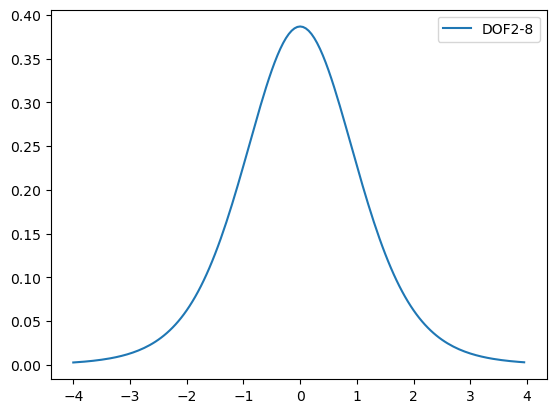

In [101]:
x=np.arange(-4,4,0.05)
y=st.t.pdf(x,DOF2)
plt.plot(x,y,label='DOF2-'+str(DOF2))
plt.legend();

# Task 2e: Business implications

# Task 3: Anova test

In [102]:
sam1=[4.05,4.01,4.04,4.02]
sam2=[4.02,3.99,4.01,3.99,4.00,4.00]
sam3=[4.00,3.97,3.95,3.98,3.97]
sam4=[4.01,4.00,3.99,4.02]

In [103]:
alpha3=0.01    # because confidence level is 99% hence significance level will be 100-99=1
DFC=4-1        # here we have 4 samples
DFE=(len(sam1)+len(sam2)+len(sam3)+len(sam4))-4   #sum of all sample len - total sample no.

In [71]:
DFC

3

In [72]:
DFE

15

# Task 3a: Hypothesis

# Task 3b: F_Critical Value

In [104]:
from scipy.stats import f,f_oneway

In [105]:
F_Critical=f.ppf(1-alpha3,DFC,DFE)
F_Critical

5.416964857818421

# Task 3c: F_Statistics and P_Value

In [77]:
F_Stats,P_Value3=f_oneway(sam1,sam2,sam3,sam4)

In [78]:
F_Stats

10.098402523912094

In [79]:
P_Value3

0.000685335440647619

# Task 3d: Conclusion and plot

In [81]:
if F_Stats < F_Critical and P_Value3 > alpha3:
    print('Accept the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


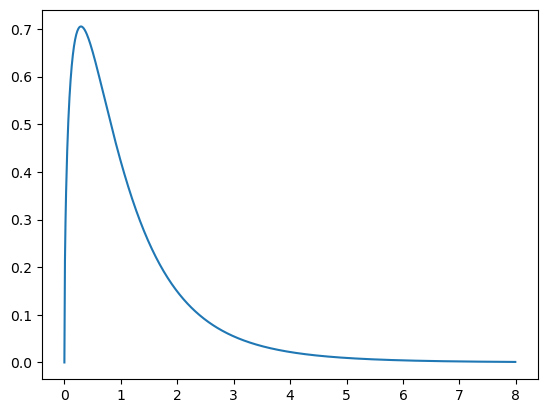

In [83]:
F_dis=st.f(DFC,DFE,loc=0,scale=1)
x=np.arange(0,8,0.01)
y=F_dis.pdf(x)
plt.plot(x,y);

# Task 3e: Business implications